In [1]:
import osmnx as ox
import geopandas as gpd

                   y          x  street_count highway  \
osmid                                                   
14459350   38.436205  27.140701             4     NaN   
14459354   38.442377  27.144249             4     NaN   
69415578   38.442162  27.145193             3     NaN   
255778840  38.437846  27.143466             3     NaN   
255778841  38.439904  27.143894             4     NaN   

                            geometry  
osmid                                 
14459350   POINT (27.14070 38.43621)  
14459354   POINT (27.14425 38.44238)  
69415578   POINT (27.14519 38.44216)  
255778840  POINT (27.14347 38.43785)  
255778841  POINT (27.14389 38.43990)  
                             osmid       highway  oneway  reversed   length  \
u        v          key                                                       
14459350 1080459426 0     93200393  unclassified   False     False   54.671   
         1080441842 0     93201274       footway   False      True   37.505   
         16

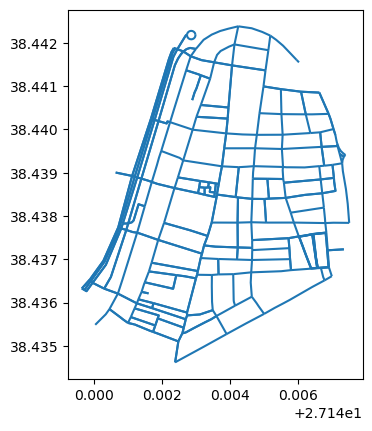

In [3]:
# Define your location (you can use a place name or coordinates)
place_name = "Alsancak Mahallesi, Konak, Izmir, Turkey"

# Retrieve the OSM data for the specified location
graph = ox.graph_from_place(place_name, network_type='all')

# Convert the OSM data to a GeoDataFrame
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# Display information about the node GeoDataFrame
print(nodes.head())

# Display information about the edge GeoDataFrame
print(edges.head())

# Perform spatial operations or visualization
# For example, you can plot the street network:
ax = edges.plot()


In [4]:
import osmnx as ox
import geopandas as gpd

# Define your location (you can use a place name or coordinates)
place_name = "Alsancak Mahallesi, Konak, Izmir, Turkey"

# Retrieve building footprints for the specified location
buildings = ox.footprints_from_place(place_name)

# Retrieve the OSM street network data for the specified location
graph = ox.graph_from_place(place_name, network_type='all')

# Convert the OSM street network data to a GeoDataFrame
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# Display information about the node GeoDataFrame
print(nodes.head())

# Display information about the edge GeoDataFrame
print(edges.head())

# Display information about the building footprints GeoDataFrame
print(buildings.head())

# Perform spatial operations or visualization
# For example, you can plot the street network and building footprints together
ax = edges.plot()
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)


AttributeError: module 'osmnx' has no attribute 'footprints_from_place'

                        addr:housenumber               addr:street  \
element_type osmid                                                   
node         435509639               398           Atatürk Caddesi   
             5287387835               12  Kıbrıs Şehitleri Caddesi   
             5287436068              NaN                       NaN   
way          153795428               NaN                       NaN   
             153795430               NaN                       NaN   

                           building                      name  \
element_type osmid                                              
node         435509639   commercial      Dalyan Gümrük İşhanı   
             5287387835         yes             Turkan Saylan   
             5287436068         yes  Galeri Mazhar İş Merkezi   
way          153795428          yes                       NaN   
             153795430          yes                       NaN   

                                                     

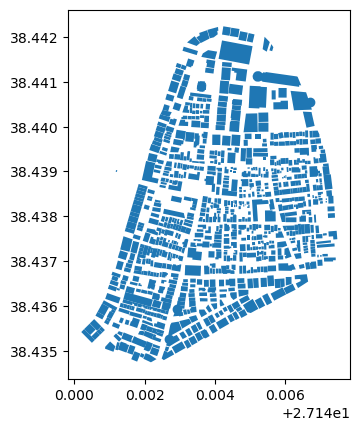

In [15]:
import osmnx as ox
import geopandas as gpd

# Define your location (you can use a place name or coordinates)
place_name = "Alsancak Mahallesi, Konak, Izmir, Turkey"

# Retrieve building footprints directly from OpenStreetMap
buildings = ox.geometries_from_place(place_name, tags={'building': True})

# Convert building footprints to a GeoDataFrame
buildings_gdf = gpd.GeoDataFrame(buildings)

# Display information about the building footprints GeoDataFrame
print(buildings_gdf.head())

# Perform spatial operations or visualization
# For example, you can plot the building footprints
ax = buildings_gdf.plot()


Buildings GeoDataFrame:
                        addr:housenumber               addr:street  \
element_type osmid                                                   
node         435509639               398           Atatürk Caddesi   
             5287387835               12  Kıbrıs Şehitleri Caddesi   
             5287436068              NaN                       NaN   
way          153795428               NaN                       NaN   
             153795430               NaN                       NaN   

                           building                      name  \
element_type osmid                                              
node         435509639   commercial      Dalyan Gümrük İşhanı   
             5287387835         yes             Turkan Saylan   
             5287436068         yes  Galeri Mazhar İş Merkezi   
way          153795428          yes                       NaN   
             153795430          yes                       NaN   

                             

<Axes: >

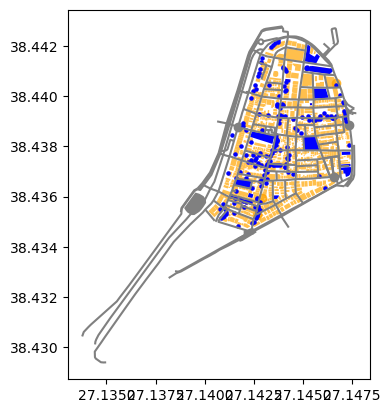

In [6]:
import osmnx as ox
import geopandas as gpd

# Define your location (you can use a place name or coordinates)
place_name = "Alsancak Mahallesi, Konak, Izmir, Turkey"

# Retrieve building footprints, roads, and amenities directly from OpenStreetMap
buildings = ox.geometries_from_place(place_name, tags={'building': True})
roads = ox.geometries_from_place(place_name, tags={'highway': True})
amenities = ox.geometries_from_place(place_name, tags={'amenity': True})

# Convert each feature type to a GeoDataFrame
buildings_gdf = gpd.GeoDataFrame(buildings)
roads_gdf = gpd.GeoDataFrame(roads)
amenities_gdf = gpd.GeoDataFrame(amenities)

# Display information about each GeoDataFrame
print("Buildings GeoDataFrame:")
print(buildings_gdf.head())
print("\nRoads GeoDataFrame:")
print(roads_gdf.head())
print("\nAmenities GeoDataFrame:")
print(amenities_gdf.head())



# Perform spatial operations or visualization
# For example, you can plot each feature type separately
ax = buildings_gdf.plot(color='orange', alpha=0.7)
roads_gdf.plot(ax=ax, color='gray')
amenities_gdf.plot(ax=ax, color='blue', markersize=5)


In [17]:
gdf = buildings_gdf

import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Project the shapefile into a 3D space
gdf['z'] = 0  # Set a constant z-coordinate for simplicity
gdf['geometry'] = gdf['geometry'].apply(lambda geom: (geom.x, geom.y, geom.z))

# Apply a trimetric projection
# Define the trimetric projection matrix
trimetric_matrix = np.array([
    [1, 0.5, 0],
    [0, 0.866, 0],  # Use 0.866 for approximately 30 degrees
    [0, 0, 1]
])

# Apply the trimetric projection to the 3D coordinates
gdf['geometry'] = gdf['geometry'].apply(lambda point: tuple(np.dot(trimetric_matrix, point)))

# Visualize the transformed 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for geom in gdf['geometry']:
    ax.scatter(*geom)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


DimensionError: This point has no z coordinate.

In [8]:
import osmnx as ox
import plotly.graph_objs as go

# Define your location (you can use a place name or coordinates)
place_name = "Alsancak Mahallesi, Konak, Izmir, Turkey"

# Retrieve building footprints, roads, and amenities directly from OpenStreetMap
buildings = ox.geometries_from_place(place_name, tags={'building': True})
roads = ox.geometries_from_place(place_name, tags={'highway': True})
amenities = ox.geometries_from_place(place_name, tags={'amenity': True})

# Assign a constant altitude value for all features
altitude = 10  # You can adjust this value as needed

# Create Plotly traces for buildings, roads, and amenities
building_trace = go.Scatter3d(
    x=buildings['geometry'].apply(lambda geom: geom.centroid.x),
    y=buildings['geometry'].apply(lambda geom: geom.centroid.y),
    z=[altitude] * len(buildings),
    mode='markers',
    marker=dict(color='orange', size=2),
    name='Buildings'
)

road_trace = go.Scatter3d(
    x=roads['geometry'].apply(lambda geom: geom.centroid.x),
    y=roads['geometry'].apply(lambda geom: geom.centroid.y),
    z=[altitude] * len(roads),
    mode='markers',
    marker=dict(color='gray', size=1),
    name='Roads'
)

amenity_trace = go.Scatter3d(
    x=amenities['geometry'].apply(lambda geom: geom.centroid.x),
    y=amenities['geometry'].apply(lambda geom: geom.centroid.y),
    z=[altitude] * len(amenities),
    mode='markers',
    marker=dict(color='blue', size=2),
    name='Amenities'
)

# Create layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Longitude'),
        yaxis=dict(title='Latitude'),
        zaxis=dict(title='Altitude'),
        aspectmode='cube'
    )
)

# Create the figure and plot
fig = go.Figure(data=[building_trace, road_trace, amenity_trace], layout=layout)
fig.show()


In [9]:
import osmnx as ox
import plotly.graph_objs as go

# Define your location (you can use a place name or coordinates)
place_name = "Alsancak Mahallesi, Konak, Izmir, Turkey"

# Retrieve building footprints, roads, and amenities directly from OpenStreetMap
buildings = ox.geometries_from_place(place_name, tags={'building': True})
roads = ox.geometries_from_place(place_name, tags={'highway': True})
amenities = ox.geometries_from_place(place_name, tags={'amenity': True})

# Assign different heights (z coordinates) to roads, buildings, and amenities
road_height = 1
building_height = 10
amenity_height = 20

# Create Plotly traces for roads, buildings, and amenities
road_trace = go.Scatter3d(
    x=roads['geometry'].apply(lambda geom: geom.centroid.x),
    y=roads['geometry'].apply(lambda geom: geom.centroid.y),
    z=[road_height] * len(roads),
    mode='markers',
    marker=dict(color='gray', size=1),
    name='Roads'
)

building_trace = go.Scatter3d(
    x=buildings['geometry'].apply(lambda geom: geom.centroid.x),
    y=buildings['geometry'].apply(lambda geom: geom.centroid.y),
    z=[building_height] * len(buildings),
    mode='markers',
    marker=dict(color='orange', size=2),
    name='Buildings'
)

amenity_trace = go.Scatter3d(
    x=amenities['geometry'].apply(lambda geom: geom.centroid.x),
    y=amenities['geometry'].apply(lambda geom: geom.centroid.y),
    z=[amenity_height] * len(amenities),
    mode='markers',
    marker=dict(color='blue', size=2),
    name='Amenities'
)

# Create layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Longitude'),
        yaxis=dict(title='Latitude'),
        zaxis=dict(title='Altitude'),
        aspectmode='cube'
    )
)

# Create the figure and plot
fig = go.Figure(data=[road_trace, building_trace, amenity_trace], layout=layout)
fig.show()


In [14]:
import osmnx as ox
import plotly.graph_objs as go

# Define your location (you can use a place name or coordinates)
place_name = "Alsancak Mahallesi, Konak, Izmir, Turkey"

# Retrieve building footprints, roads, and amenities directly from OpenStreetMap
buildings = ox.geometries_from_place(place_name, tags={'building': True})
roads = ox.geometries_from_place(place_name, tags={'highway': True})
amenities = ox.geometries_from_place(place_name, tags={'amenity': True})

# Assign different heights (z coordinates) to roads, buildings, and amenities
road_height = 1
building_height = 10
amenity_height = 20

# Extract coordinates for roads, buildings, and amenities
road_lines = [line.coords[:] for line in roads['geometry'] if isinstance(line, LineString)]
building_polygons = [polygon.exterior.coords[:] for polygon in buildings['geometry'] if isinstance(polygon, Polygon)]
amenity_polygons = [polygon.exterior.coords[:] for polygon in amenities['geometry'] if isinstance(polygon, Polygon)]

# Create Plotly traces for roads, buildings, and amenities
road_trace = go.Scatter3d(
    x=[coord[0] for line in road_lines for coord in line],
    y=[coord[1] for line in road_lines for coord in line],
    z=[road_height] * sum(len(line) for line in road_lines),
    mode='lines',
    line=dict(color='gray', width=2),
    name='Roads'
)

building_trace = go.Mesh3d(
    x=[coord[0] for polygon in building_polygons for coord in polygon],
    y=[coord[1] for polygon in building_polygons for coord in polygon],
    z=[building_height] * sum(len(polygon) for polygon in building_polygons),
    opacity=0.5,
    color='orange',
    name='Buildings'
)

amenity_trace = go.Mesh3d(
    x=[coord[0] for polygon in amenity_polygons for coord in polygon],
    y=[coord[1] for polygon in amenity_polygons for coord in polygon],
    z=[amenity_height] * sum(len(polygon) for polygon in amenity_polygons),
    opacity=0.5,
    color='blue',
    name='Amenities'
)

# Create layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Longitude'),
        yaxis=dict(title='Latitude'),
        zaxis=dict(title='Altitude'),
        aspectmode='cube'
    )
)

# Create the figure and plot
fig = go.Figure(data=[road_trace, building_trace, amenity_trace], layout=layout)
fig.show()
